### Arbeidskrav 5

In [1]:
# importer pakker
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

**Oppgave 1.a**

Finn et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen.

In [47]:
# definer symboler

K, N, x, lmda, C = sp.symbols('K N x \lambda C', real= True, positive= True)

In [80]:
# produktfunksjon
def f(N, K):
    return (N**0.5) * (K**0.5)


#enheter fra oppgave
K_0 = 10
K_1 = 50
r = 500
w = 350
fk = 10000

In [82]:
der_n = sp.lambdify(
    (x, K),
    sp.solve(sp.Eq(f(N, K), x), N)[0]

#Funkjson for total produksjonskostnad
def C(N, K):
    return w*der_n(N, K) + r*K +fk

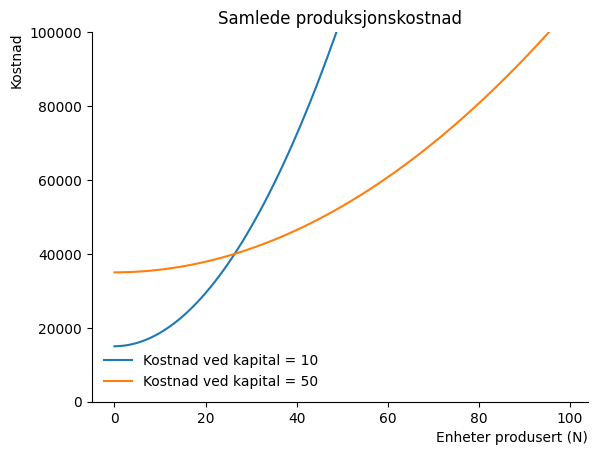

In [98]:
#Lager akse
n=np.linspace(0.1,100,100)

fig1, ax = plt.subplots()
ax.set_ylabel('Kostnad', loc='top')
ax.set_xlabel('Enheter produsert (N)', loc='right')
ax.set(ylim=(0,100000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


#Plotter funkjsonene
ax.plot(C(n, K_0), label="Kostnad ved kapital = 10")
ax.plot(C(n, K_1), label="Kostnad ved kapital = 50")
ax.set_title('Samlede produksjonskostnad')
ax.legend(loc= 'best', frameon=False);


Vi ser at selv om det er lavere inngangskostnad ved lavere kapital så øker den samlede produksjonskostnaden hurtigt. Og ved litt over 20 enheter lønner det seg å betale for den ekstra kapitalen.

**Oppgave 1.b**

I en ny figur tegn totale gjennomsnittskostnader på kort sikt, variabler gjennomsnittskostnader på kort sikt, og grensekostnaden på kort sikt.

In [89]:
#Grensekostnad
gr_cost = sp.lambdify(
    (N, K),
    sp.diff(C(N, K), N)
)

#Gjennomsnittelig kostnad
def avg_cost(N, K):
    return C(N, K)/N

#Gjennomsnittelig kostnad før faste kostnader
def avg_cost_wo_fk(N, K):
    return (C(N, K)-fk)/N


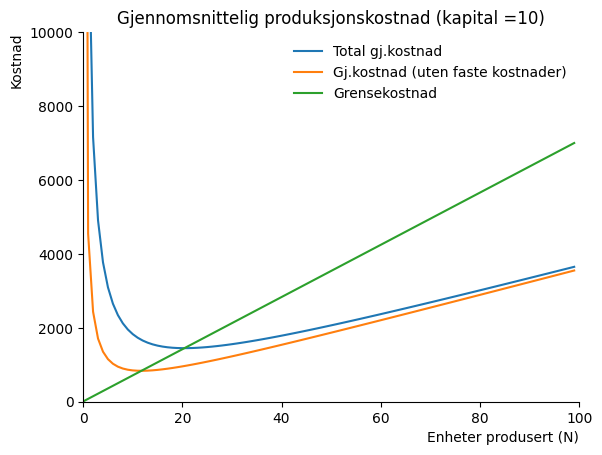

In [103]:
fig1, ax = plt.subplots()
ax.set_ylabel('Kostnad', loc='top')
ax.set_xlabel('Enheter produsert (N)', loc='right')
ax.set(ylim=(0,10000))
ax.set_xlim(0, 100)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


#Plotter funkjsonene
ax.plot(avg_cost(n, K_0), label="Total gj.kostnad")
ax.plot(avg_cost_wo_fk(n, K_0), label="Gj.kostnad (uten faste kostnader)")
ax.plot(gr_cost(n, K_0), label="Grensekostnad")
ax.set_title('Gjennomsnittelig produksjonskostnad (kapital =10)')
ax.legend(loc= 'best', frameon=False);

Der grensekostnad skjærer funksjonene til gj.kostnad indikerer mengden enheter produsert som til sammen har lavest mulig gjennomsnittelig kostnad per enhet (bunnpunktet).

**Oppgave 1.c**

Vi ser at det er konstant skalautbytte - vi når et bunnivå i gjennomsnittelig kostnad før så de marginale kostandene(grensekostnadene) øker lineært, og det blir over tid dyrere for hver nye enhet produsert.

**Oppgave 2**

Hvorfor er det relative forholdet mellom K og N i en optimal løsning kun avhengig av økonomiske faktorer her, og ikke produksjonselastisitetene (dvs faktorer fra produktfunksjonen)? 

In [111]:
a, b, N,K,X,lmda,w,r=sp.symbols('a b N K X \lambda, w, r', real=True, positive=True)

def x(N,K):
    return (N**a)*(K**b)
x(N,K)

# Lagrange likning
L=w*N + r*K-lmda*(x(N,K)-X)

# deriver mhp N og K

dL_N=sp.diff(L,N)
dL_K=sp.diff(L,K)
foc_N=sp.Eq(dL_N,0)
foc_K=sp.Eq(dL_K,0)

# da kan vi skrive den rel prisen på arbeidskraft (w/r) som
rel_w=(dL_N.args[0]/dL_K.args[0])

# og mtsb som
mtsb=(dL_N.args[1]/dL_K.args[1])

# sett disse lik som i likning (7)
optimal=sp.Eq(rel_w,mtsb)
display(optimal)

Eq(w/r, K*a/(N*b))

Fordi det er et konstant skalautbytte. Det er proposjonal endring mellom faktorene og mengden produsert. MTSB, ligger langs samme isokostlinje.